In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
root_path = '/content/drive/My Drive/AI PROJECTS/GNN/dataset'

In [ ]:
def basic_reprocessing(df):
  # remove unknown protocol
  df = df[df['protocol'] != 'unknown']

  # remove dns protocol
  df = df[(df['source_port'] != 53) & (df['destination_port'] != 53) & 
        (df['source_port'] != 5353) & (df['destination_port'] != 5353) &
        (df['source_port'] != 137) & (df['destination_port'] != 137) &
        (df['source_port'] != 67) & (df['destination_port'] != 67) &
        (df['source_port'] != 68) & (df['destination_port'] != 68) &
        (df['source_port'] != 5355) & (df['destination_port'] != 5355)]
  
  # remove IP 239.255.255.250, protocol SSDP
  df = df[(df['source_address'] != '239.255.255.250') & (df['destination_address'] != '239.255.255.250')]


  # get server destination column 
  df['des_greater_src'] = df['destination_port'] - df['source_port']
  df1 = df[df['des_greater_src'] > 0]
  df2 = df[df['des_greater_src'] < 0]
  df1['destination'] = df1['source_address']
  df1['port'] = df1['source_port']
  df2['destination'] = df2['destination_address']
  df2['port'] = df2['destination_port']
  df = pd.concat([df1, df2], ignore_index=True).sort_values(by='time').reset_index(drop=True)

  # merge IP address into port (same tuple (IP, port) - same network destination)
  df['IP_port'] = list(zip(df['destination'], df['port']))

  return df

In [ ]:
# path = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/node_nums.json'
# with open(path, 'r') as f:
#   node_nums = json.load(f)
# count = len(list(node_nums.keys()))

# First run
node_nums = dict()
count = 0

sample_length = 1 # minutes
overlap_length = 0 # minutes

sources_folder = os.path.join(root_path, 'sources')


for app in os.listdir(sources_folder):
  if app not in node_nums.keys():
    count += 1
    print(count)
    nums = []

    print('Processing %s ...' % app)
    app_folder = os.path.join(sources_folder, app)

    for filename in os.listdir(app_folder):
      index = 1

      file_path = os.path.join(app_folder, filename)
      df = pd.read_csv(file_path, index_col=0)
      base = df['time'].iloc[0]
      end = df['time'].iloc[-1]
      
      while ((index - 1)*(sample_length - overlap_length) + sample_length)*60 + base < end:
        start_time = base + (index-1)*(sample_length - overlap_length)*60
        end_time = start_time + sample_length*60
        df_ = df[(df['time'] >= start_time) & (df['time'] <= end_time)].reset_index(drop=True)

        # get number of nodes
        df_ = basic_reprocessing(df_)
        nodes = list(df_['IP_port'].unique())
        nums.append(len(nodes))

        index += 1
    
    node_nums[app] = nums
    print('...................................................')

1
Processing diijam ...
...................................................
2
Processing baomoi ...
...................................................
3
Processing fptplay ...
...................................................
4
Processing iQIYI ...
...................................................
5
Processing bigo ...
...................................................
6
Processing myradio ...
...................................................
7
Processing spotify ...
...................................................
8
Processing nhaccuatui ...
...................................................
9
Processing soundcloud ...
...................................................
10
Processing sachnoiapp ...
...................................................
11
Processing phim247 ...
...................................................
12
Processing popskid ...
...................................................
13
Processing truyenaudiosachnoiviet ...
..............................

In [ ]:
# save to json file
path = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/1_0/node_nums.json'
with open(path, 'w') as f:
    json.dump(node_nums, f)

## Test

In [ ]:
path1 = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/1_0/node_nums.json'
path2 = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/2_0/node_nums.json'
path3 = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/3_1/node_nums.json'
path4 = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/4_2/node_nums.json'
path5 = '/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/node_nums.json'

with open(path1, 'r') as f:
  node_nums1 = json.load(f)
with open(path2, 'r') as f:
  node_nums2 = json.load(f)
with open(path3, 'r') as f:
  node_nums3 = json.load(f)
with open(path4, 'r') as f:
  node_nums4 = json.load(f)
with open(path5, 'r') as f:
  node_nums5 = json.load(f)

## Draw the distribution of the number of nodes

In [ ]:
all_node_nums1 = []
for k in node_nums1.keys():
  all_node_nums1.extend(node_nums1[k])
all_node_nums2 = []
for k in node_nums2.keys():
  all_node_nums2.extend(node_nums2[k])
all_node_nums3 = []
for k in node_nums3.keys():
  all_node_nums3.extend(node_nums3[k])
all_node_nums4 = []
for k in node_nums4.keys():
  all_node_nums4.extend(node_nums4[k])
all_node_nums5 = []
for k in node_nums5.keys():
  all_node_nums5.extend(node_nums5[k])

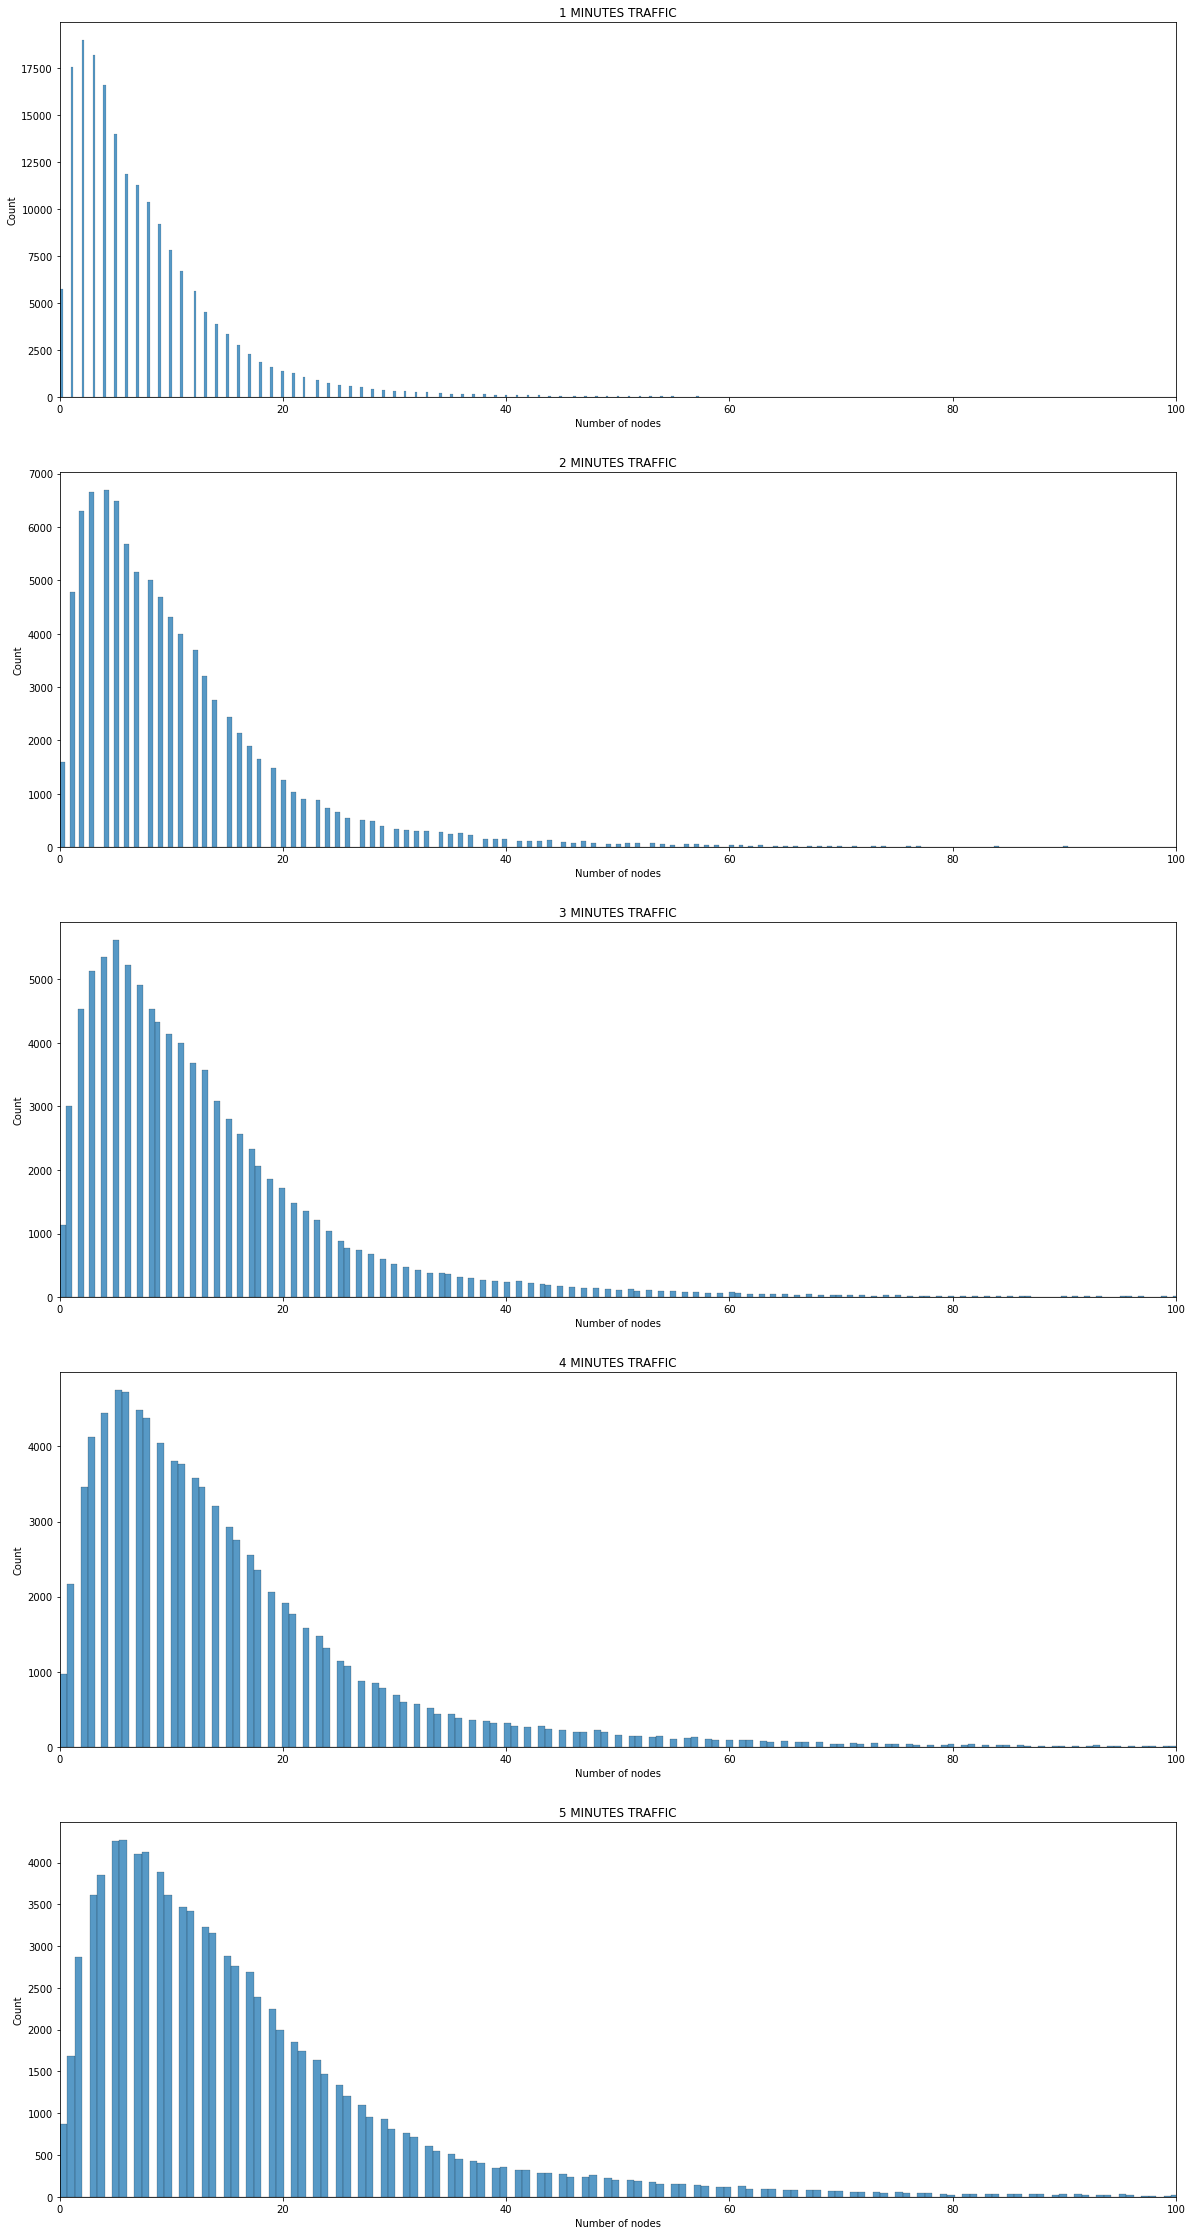

In [ ]:
fig, ax = plt.subplots(figsize=(20, 40), ncols=1, nrows=5)

sns.histplot(all_node_nums1, ax=ax[0])
sns.histplot(all_node_nums2,  ax=ax[1])
sns.histplot(all_node_nums3,  ax=ax[2])
sns.histplot(all_node_nums4,  ax=ax[3])
sns.histplot(all_node_nums5,  ax=ax[4])

ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[2].set_xlim(0, 100)
ax[3].set_xlim(0, 100)
ax[4].set_xlim(0, 100)

ax[0].set_xlabel('Number of nodes')
ax[0].set_title('1 MINUTES TRAFFIC')
ax[1].set_xlabel('Number of nodes')
ax[1].set_title('2 MINUTES TRAFFIC')
ax[2].set_xlabel('Number of nodes')
ax[2].set_title('3 MINUTES TRAFFIC')
ax[3].set_xlabel('Number of nodes')
ax[3].set_title('4 MINUTES TRAFFIC')
ax[4].set_xlabel('Number of nodes')
ax[4].set_title('5 MINUTES TRAFFIC')

plt.show()

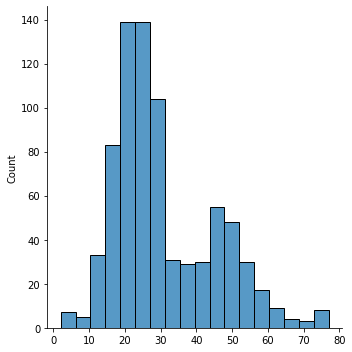

In [ ]:
sns.displot(node_nums['baomoi'])
plt.show()

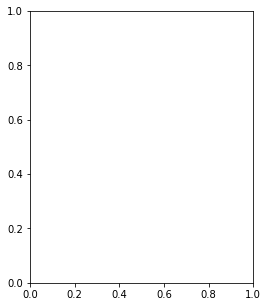

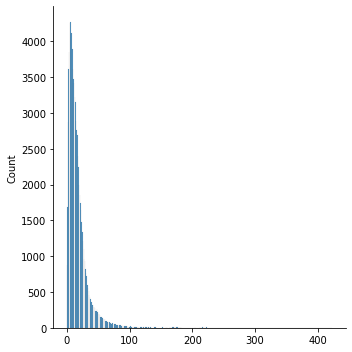

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# Setting the data
x = ["Student1", "Student2"]
y = [70, 87]
  
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(4, 5))
  
# drawing the plot
# sns.barplot(x, y, ax=ax)
sns.displot(data=all_node_nums, ax=ax)
plt.show()